# Семинар 15. Pandas_3

        
Анализ датасета: [Seattle Fremont Bridge Bike Counter](http://www.seattle.gov/transportation/projects-and-programs/programs/bike-program/bike-counters/fremont-bike-counters)

## Pandas Cheat Sheet

https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

## Python Data Science Handbook

https://jakevdp.github.io/PythonDataScienceHandbook/

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Задание

- Отыскать ссылки для загрузки данных и ассоциировать с ними имена `url...`
- Выяснить, в каком формате выдаются данные
- Загрузить данные при помощи `pandas`

In [61]:
url0 = 'https://www.eco-visio.net/api/aladdin/1.0.0/pbl/publicwebpage/data/101020981?begin=20121008&end=20211016&step=3&domain=854&t=db8a1988058bc5cc112ab52690b32e2763fa6840993e570e937f41d4c454db10&withNull=true'
url1 = 'https://www.eco-visio.net/api/aladdin/1.0.0/pbl/publicwebpage/data/102020981?begin=20121008&end=20211016&step=3&domain=854&t=db8a1988058bc5cc112ab52690b32e2763fa6840993e570e937f41d4c454db10&withNull=true'

In [62]:
df0 = pd.read_json(url0)
df1 = pd.read_json(url1)

## Задание

Изучить данные
- количество и типы столбцов
- количество записей
- что означают столбцы?

In [63]:
df0.head()

,date,comptage,timestamp
0,2012-10-08 00:00:00,4,2012-10-08 00:00:00
1,2012-10-08 01:00:00,2,2012-10-08 01:00:00
2,2012-10-08 02:00:00,5,2012-10-08 02:00:00
3,2012-10-08 03:00:00,1,2012-10-08 03:00:00
4,2012-10-08 04:00:00,3,2012-10-08 04:00:00


In [64]:
np.all(df0.date == df0.timestamp)

True

## Задание

- Преобразовать строки в формат `datetime`
- Выбросить лишние столбцы
- Объединить в одну таблицу

In [66]:
df1.drop(columns='timestamp')

,date,comptage
0,2012-10-08 00:00:00,5
1,2012-10-08 01:00:00,2
2,2012-10-08 02:00:00,0
3,2012-10-08 03:00:00,4
4,2012-10-08 04:00:00,2
...,...,...
79062,2021-10-15 19:00:00,50
79063,2021-10-15 20:00:00,25
79064,2021-10-15 21:00:00,22
79065,2021-10-15 22:00:00,13


In [68]:
df0.loc[:,:'comptage']

,date,comptage
0,2012-10-08 00:00:00,4
1,2012-10-08 01:00:00,2
2,2012-10-08 02:00:00,5
3,2012-10-08 03:00:00,1
4,2012-10-08 04:00:00,3
...,...,...
79062,2021-10-15 19:00:00,20
79063,2021-10-15 20:00:00,13
79064,2021-10-15 21:00:00,13
79065,2021-10-15 22:00:00,13


In [65]:
df0[['date', 'comptage']]

,date,comptage
0,2012-10-08 00:00:00,4
1,2012-10-08 01:00:00,2
2,2012-10-08 02:00:00,5
3,2012-10-08 03:00:00,1
4,2012-10-08 04:00:00,3
...,...,...
79062,2021-10-15 19:00:00,20
79063,2021-10-15 20:00:00,13
79064,2021-10-15 21:00:00,13
79065,2021-10-15 22:00:00,13


In [74]:
df = pd.merge(df0[['date', 'comptage']], df1[['date', 'comptage']], on='date')
df.rename(columns = {'comptage_x':'east', 'comptage_y':'west'}, inplace=True)
df['total'] = df.east + df.west
df['diff'] = df.east - df.west
df.set_index('date', inplace=True)
df.head()

,east,west,total,diff
date,,,,
2012-10-08 00:00:00,4,5,9,-1
2012-10-08 01:00:00,2,2,4,0
2012-10-08 02:00:00,5,0,5,5
2012-10-08 03:00:00,1,4,5,-3
2012-10-08 04:00:00,3,2,5,1


## Задание

- Повторить график с сайта (дневные потоки велосипедистов)

<AxesSubplot:xlabel='date'>

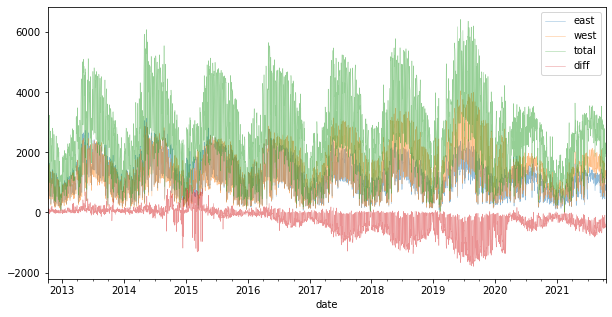

In [83]:
#df.groupby(df.index.date).sum().plot(figsize=(10,5), lw=0.5, alpha=0.5)
df.resample('1D').sum().plot(figsize=(10,5), lw=0.5, alpha=0.5)

## Задание

- Визуализировать среднегодовые потоки велосипедистов

<AxesSubplot:xlabel='date'>

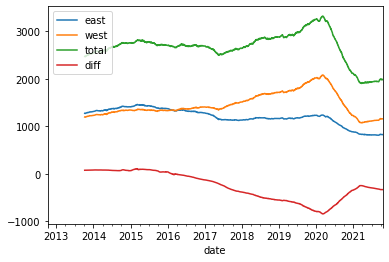

In [86]:
df.resample('1D').sum().rolling(365).mean().plot()

## Задание

- Визуализировать изменение среднего количества велосипедистов в течение дня

<AxesSubplot:xlabel='date'>

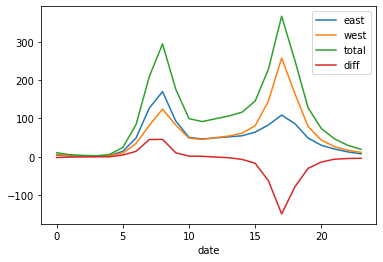

In [90]:
df.groupby(df.index.hour).mean().plot()

## Задание

- Построить сводную таблицу для среднего числа велосипедистов: строки - время, столбцы - дата

In [93]:
pdf = df.pivot_table(index=df.index.hour, columns=df.index.date, values='total')
pdf.head()

,2012-10-08,2012-10-09,2012-10-10,2012-10-11,2012-10-12,2012-10-13,2012-10-14,2012-10-15,2012-10-16,2012-10-17,...,2021-10-06,2021-10-07,2021-10-08,2021-10-09,2021-10-10,2021-10-11,2021-10-12,2021-10-13,2021-10-14,2021-10-15
date,,,,,,,,,,,,,,,,,,,,,
0,9.0,12.0,15.0,21.0,17.0,18.0,6.0,7.0,10.0,22.0,...,7.0,4.0,5.0,10.0,14.0,1.0,4.0,1.0,2.0,7.0
1,4.0,3.0,3.0,10.0,13.0,11.0,9.0,3.0,5.0,6.0,...,6.0,0.0,3.0,9.0,6.0,1.0,5.0,0.0,3.0,2.0
2,5.0,4.0,3.0,13.0,5.0,16.0,8.0,5.0,3.0,5.0,...,2.0,3.0,3.0,6.0,9.0,1.0,1.0,1.0,2.0,0.0
3,5.0,8.0,4.0,2.0,7.0,4.0,4.0,3.0,5.0,4.0,...,1.0,2.0,3.0,2.0,1.0,3.0,1.0,4.0,5.0,1.0
4,5.0,9.0,5.0,12.0,5.0,3.0,5.0,6.0,5.0,7.0,...,12.0,6.0,5.0,3.0,2.0,3.0,5.0,4.0,7.0,3.0


## Задание 

- Применить метод Principal Component Analysis (PCA, анализ главных компонент) для снижения размерности до двумерного пространства (`from sklearn.decomposition import PCA`)
- Визуализировать полученное множество точек

In [97]:
from sklearn.decomposition import PCA
X = pdf.fillna(0.0).T
arr = PCA(2).fit_transform(X)
arr

array([[ 343.78528571,  -16.61943428],
       [ 365.45696953,  -71.04078963],
       [ 269.86772267,  -77.62887707],
       ...,
       [ -96.18102792,    6.30549093],
       [-136.53282663,  -53.5059645 ],
       [-233.65898545,  -14.04146316]])

<AxesSubplot:xlabel='x', ylabel='y'>

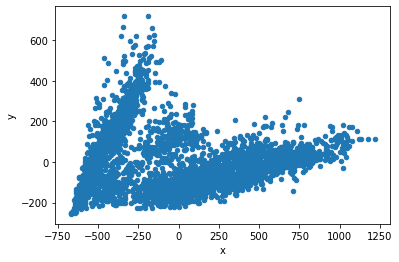

In [100]:
pd.DataFrame(arr, columns=['x', 'y']).plot.scatter('x', 'y')

## Задание 

- Предположив, что распределение является суммой нормальных распределений, кластеризовать данные (`from sklearn.mixture import GaussianMixture`)
- Визуализировать множество точек используя номер кластера для придания цвета точкам

In [116]:
from sklearn.mixture import GaussianMixture
labels = GaussianMixture(2).fit_predict(X)

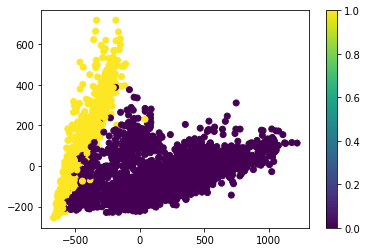

In [117]:
plt.scatter(arr[:, 0], arr[:, 1], c=labels)
plt.colorbar();

## Задание 

- Проверить, какие дни недель свойственны какому кластеру

In [121]:
wd = pd.to_datetime(pdf.columns).weekday

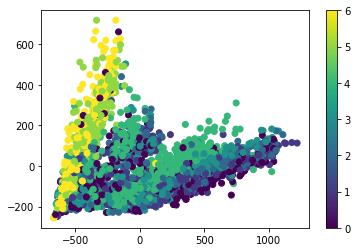

In [122]:
plt.scatter(arr[:, 0], arr[:, 1], c=wd)
plt.colorbar();

## Задание 

- Выявить даты событий, когда день недели не соответствовал кластеру
- Какие из дат Вам знакомы?

In [124]:
pdf.columns[(labels == 1) & (wd < 5)]

Index([2012-11-22, 2012-11-23, 2012-12-25, 2013-01-01, 2013-05-27, 2013-07-04,
       2013-07-05, 2013-09-02, 2013-11-28, 2013-11-29, 2013-12-20, 2013-12-25,
       2014-01-01, 2014-04-23, 2014-05-26, 2014-07-04, 2014-09-01, 2014-11-27,
       2014-12-25, 2014-12-26, 2015-01-01, 2015-05-25, 2015-07-03, 2015-09-07,
       2015-11-26, 2015-11-27, 2015-12-24, 2015-12-25, 2016-01-01, 2016-05-30,
       2016-07-04, 2016-09-05, 2016-11-24, 2016-11-25, 2016-12-26, 2017-01-02,
       2017-02-06, 2017-05-29, 2017-07-04, 2017-09-04, 2017-11-23, 2017-11-24,
       2017-12-25, 2018-01-01, 2018-05-28, 2018-07-04, 2018-09-03, 2018-11-22,
       2018-11-23, 2018-12-24, 2018-12-25, 2019-01-01, 2019-02-04, 2019-02-05,
       2019-02-08, 2019-02-11, 2019-02-12, 2019-05-27, 2019-07-04, 2019-07-05,
       2019-09-02, 2019-11-28, 2019-12-25, 2020-01-01, 2020-03-30, 2020-03-31,
       2020-05-25, 2020-07-03, 2020-08-14, 2020-09-07, 2020-11-26, 2020-11-27,
       2020-12-23, 2020-12-24, 2020-12-25, 2020-12-2